<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/ANN_%20better_resolution/PSD_histogram_CNN_B_r_squared_jun_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7 MB 14.1 MB/s 


In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 365, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 365 (delta 40), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (365/365), 165.37 MiB | 16.42 MiB/s, done.
Resolving deltas: 100% (163/163), done.
/content/marquesgabi_fev_2020/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.70 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [ ]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [ ]:
df=Segmenta(img)
Img_Size = 28

In [ ]:
print(df)

    Width           0           1  ...         781         782         783
0     169  148.459702  144.008743  ...    1.678337    0.905991    0.194111
1     131  129.627472  132.874954  ...  140.929489  140.702515  142.926743
2     115  151.296402  158.510452  ...  153.334579  162.392426  170.470001
3     117  148.841766  137.787781  ...  201.365479  202.481339  185.461548
4     193  123.784027  144.643372  ...  131.337830  118.064262  108.706863
5     196  186.387756  187.204071  ...  150.857147  148.551010  145.040817
6     130  123.551254  128.767807  ...    5.760236   74.263901  125.439774
7     107  130.404922  131.528870  ...  149.418198  148.958954  149.312531
8     134    2.943640   45.607040  ...   46.423256   20.918243   18.400089
9     134  195.728455  207.188461  ...  185.331039  183.144806  185.807739
10    189  142.581619  149.588486  ...  116.657066  116.108368  109.320992
11    162  179.211411  234.431351  ...    0.114617    1.375553    1.023472
12    112  165.000000  16

In [ ]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [ ]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.28 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [ ]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [ ]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [ ]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 32, 64, 128 '
N1 = 200
N2 = 10

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=32, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 20s 131ms/step - loss: 0.5424 - accuracy: 0.6991 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 47ms/step - loss: 0.2885 - accuracy: 0.8470 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 48ms/step - loss: 0.1933 - accuracy: 0.9137 - val_loss: 0.6935 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 47ms/step - loss: 0.1165 - accuracy: 0.9449 - val_loss: 0.6946 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 48ms/step - loss: 0.0836 - accuracy: 0.9648 - val_loss: 0.6943 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 49ms/step - loss: 0.0409 - accuracy: 0.9850 - val_loss: 0.6936 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 47ms/step - loss: 0.0511 - accuracy: 0.9850 - val_loss: 0.6940 - val_accuracy: 0.5102
Epoc

In [ ]:
Y_test = yback(Y_test)

In [ ]:
pred_test= model.predict_classes(X_test)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Predict   0   1
Actual         
0        70   2
1         6  69


In [ ]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  prediction = model.predict_classes(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


    Width           0           1  ...         781         782         783
7   148.0   93.258591  112.881683  ...  148.254196  144.523010  144.244720
10  118.0  148.542664  151.592361  ...  174.581726  176.222641  171.440674
31  127.0  203.345963  212.448456  ...  144.418137  144.455826  147.431961
33  149.0  175.012482  176.067123  ...  159.641495  144.050949  148.073563
4   112.0  154.750000  153.625000  ...  149.312500  147.812500  149.250000
12  195.0  195.908798  198.681229  ...  149.547119  152.324432  153.910873
21  179.0  148.781616  157.625290  ...  169.549179  168.662445  166.787186
24  114.0    0.249923    0.285011  ...   40.348106   25.417974   23.478916
28  118.0    1.012065    1.857799  ...    1.896581    1.024131    0.107153
30  127.0  160.710953  170.662109  ...   95.448380  114.565071  127.864464
18  150.0   38.912357   36.943642  ...  139.385590  144.016006  145.510056
22  186.0  160.819641  174.907501  ...  151.140030  117.872711  114.200607
25  113.0  157.093582  16

In [ ]:
Width=np.array(Width_new)

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 660, done.
remote: Counting objects: 100% (421/421), done.
remote: Compressing objects: 100% (419/419), done.
remote: Total 660 (delta 263), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (660/660), 5.45 MiB | 12.98 MiB/s, done.
Resolving deltas: 100% (400/400), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
%cd marquesgabi_out_2020
PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 6.58 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [ ]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [ ]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
7,148.0,93.258591,112.881683,133.175323,141.144638,149.059891,164.183334,170.430252,169.368881,164.439743,162.267365,161.605560,164.470428,167.387146,167.598251,163.008774,145.810822,172.452148,205.658157,186.296570,169.445602,165.505493,160.199402,143.132935,112.874359,87.141716,90.060638,94.523750,130.550766,104.710014,112.001472,124.338943,137.790375,159.728271,166.655960,174.161438,179.821045,168.804993,163.490860,164.403229,...,122.842957,141.652313,139.415634,132.777206,132.421478,140.658875,144.873627,144.111755,145.959106,147.414902,143.234482,140.417831,145.570496,147.941574,154.729004,157.956177,154.830551,147.845154,142.497452,140.604828,139.566849,139.965668,139.529602,131.157791,121.100082,118.794022,122.852455,127.370346,133.222061,146.593872,147.162903,135.451431,130.235214,138.084015,143.191391,143.298767,145.892639,148.254196,144.523010,144.244720
10,118.0,148.542664,151.592361,150.369705,160.234131,168.911514,176.801788,174.722488,180.635147,173.162018,105.781372,102.812126,104.847748,106.505028,109.091057,111.406494,108.495827,96.600983,79.495544,69.486649,68.601257,73.881638,85.599541,87.449867,80.765587,114.431190,130.239304,130.318298,165.600693,147.729095,155.149963,155.006882,164.148514,170.079575,178.574265,180.225494,179.356216,168.333511,109.729668,110.382935,...,169.930191,165.318878,161.974152,147.855194,164.570816,171.949142,169.829636,168.998276,173.818146,174.619064,174.469696,169.228088,192.266571,190.585464,168.122955,170.367706,171.620499,151.299332,139.720764,155.446701,169.038773,165.724213,168.435501,162.733109,163.091919,163.051132,166.831390,164.960068,169.882507,167.687729,125.087036,130.941681,170.697784,171.065491,174.160019,173.752655,175.692886,174.581726,176.222641,171.440674
31,127.0,203.345963,212.448456,208.235535,171.894409,140.617096,149.033722,156.599548,173.593399,200.601227,231.985809,237.137451,234.926758,231.299088,225.539032,216.179810,197.724716,137.303253,168.804260,176.924850,180.117233,184.823807,183.205704,211.370087,245.703262,251.445465,252.417496,251.890686,246.366745,196.903275,201.834900,191.397903,169.897659,157.488174,154.426132,149.253143,138.789139,129.266235,139.653351,151.411758,...,121.589737,122.293198,120.065659,125.154747,136.985611,141.741531,135.948105,136.571579,135.823547,142.404861,144.244034,143.874374,140.500977,118.769295,109.855667,108.507156,108.480255,105.905640,100.012215,99.360962,99.728630,95.924545,96.737114,98.276703,103.992432,107.415710,109.434929,111.774933,114.636543,112.888519,116.144150,121.172729,138.308945,140.661484,141.011673,142.834961,147.104828,144.418137,144.455826,147.431961
33,149.0,175.012482,176.067123,171.606415,162.359909,151.592499,132.698227,128.440353,125.656235,130.852859,134.804825,137.914825,138.349396,138.753662,133.816681,122.404716,120.988571,124.657051,123.229446,117.881233,118.514084,117.433136,115.531425,164.200806,188.596008,202.860992,212.608658,203.084885,173.190704,178.619156,177.437698,171.025711,166.828171,153.778702,127.686012,133.200577,135.076797,132.457275,130.615829,135.030350,...,157.103241,149.810959,144.729019,168.925598,185.569763,196.237305,206.641327,205.386337,204.469040,196.736847,175.191895,156.799103,136.594437,129.934814,114.800247,107.379494,110.839478,133.543579,151.675690,156.685745,155.808487,157.738220,158.638580,155.154770,150.416153,153.688080,152.995956,152.330750,151.700790,158.429489,157.677277,167.956635,175.961731,181.739212,194.563766,195.466156,183.637451,159.641495,144.050949,148.073563
4,112.0,154.750000,153.625000,156.687500,163.500000,168.250000,175.062500,178.062500,174.750000,172.062500,169.187500,159.312500,150.062500,150.687500,149.875000,144.312500,143.625000,146.437500,146.625000,144.31

In [ ]:
Area = np.array(PSD_new['Area'])
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [ ]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

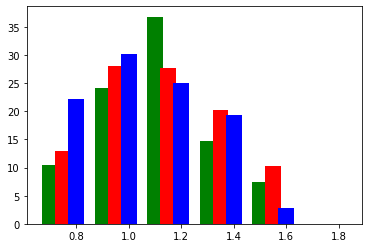

In [ ]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105, 0.]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227, 0.]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

In [ ]:
yy[0][0]


array([10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105,
        0.        ])

In [ ]:
yy[0][1]

array([20., 16., 44., 12.,  8.,  0.])

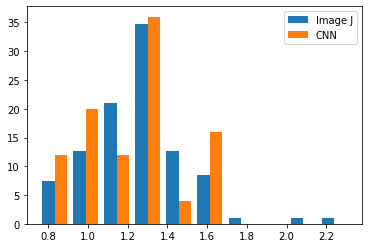

In [ ]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.07368421, 0.2       , 0.41052632, 0.75789474, 0.88421053,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.12      , 0.32      , 0.44      , 0.8       , 0.84      ,
         1.        , 1.        , 1.        , 1.        , 1.        ]]),
 array([0.75356807, 0.90995518, 1.06634229, 1.22272941, 1.37911652,
        1.53550363, 1.69189074, 1.84827785, 2.00466497, 2.16105208,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

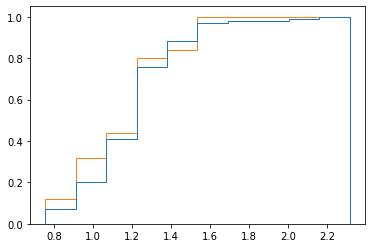

In [ ]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.9800374775326016


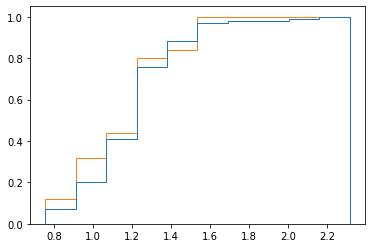

In [ ]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [ ]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [ ]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


In [ ]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,200,10,0.980037,1.0,0.945578,0.000003,0.328443,"3 layers of Convolution: 32, 64, 128"


<a list of 2 Lists of Patches objects>
[0.75356807 0.90995518 1.06634229 1.22272941 1.37911652 1.53550363
 1.69189074 1.84827785 2.00466497 2.16105208 2.31743919]
[[ 7.36842105 12.63157895 21.05263158 34.73684211 12.63157895  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [12.         20.         12.         36.          4.         16.
   0.          0.          0.          0.        ]]


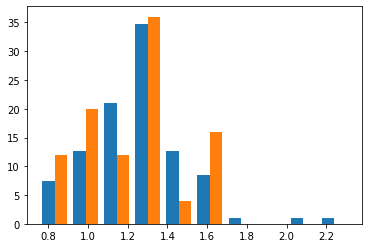

In [ ]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [ ]:
print(counts.sum())

200.0000000000001


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


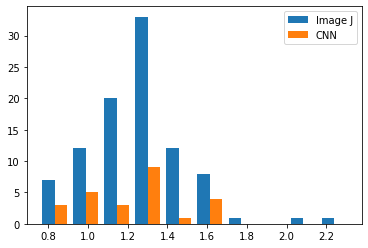

In [ ]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [ ]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1

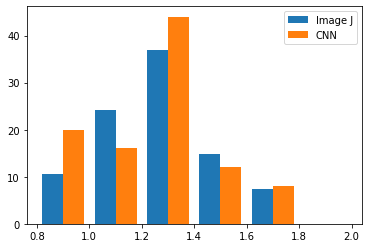

In [ ]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

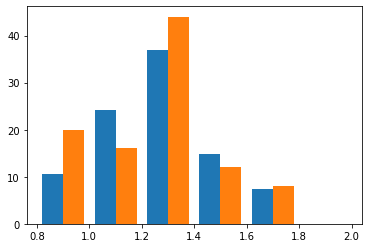

In [ ]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [ ]:
yy[0][0]

array([10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105,
        0.        ])

In [ ]:
bins_list

[0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [ ]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [ ]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details,0.8,1.0,1.2,1.4,1.6,1.8
0,200,10,0.980037,1.0,0.945578,0.000003,0.328443,"3 layers of Convolution: 32, 64, 128",20.0,16.0,44.0,12.0,8.0,0.0


In [ ]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>